### import 및 option list

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

font1 = {'family': 'serif',
         'color': 'b',
         'weight': 'bold',
         'size': 14
         }

In [138]:
pd.options.display.float_format = '{:.1f}'.format # 전체 숫자 표시 (e 제거)
pd.options.display.float_format = '{:,}'.format # 숫자 , 구분
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50
pd.options.display.max_info_columns =50
pd.options.display.float_format = '{:,}'.format
print('1') #제대로 적용됐음을 확인

1


In [139]:
# 한글폰트 깨짐 방지
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='darkgrid')
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

### 데이터 가져오기

In [140]:
data = pd.read_excel('데이터분석프로젝트_VER2_210329_210926.xlsx')
df = data.copy() #원본 데이터 복사
df.shape #데이터 크기 확인

(105419, 18)

### 분석 전 데이터 정보 확인

In [141]:
df.info() #결측값 확인
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [142]:
a = df.isna().sum()/len(df)*100 #결측치 비율 확인
round(a,1) #1자리수만 나오게

id                        0.0
customer_id               0.0
course_id                 4.9
type                      0.0
state                     0.0
course_title              0.0
category_title            0.0
format                    0.0
completed_at              0.0
transaction_amount        0.0
coupon_title             69.8
coupon_discount_amount   69.8
sale_price                1.1
tax_free_amount           1.1
pg                       14.3
method                   12.4
subcategory_title        18.8
marketing_start_at       17.1
dtype: float64

In [143]:
df.isnull().sum() #빈값 확인

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [144]:
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,"504,760.0","201,435.0",ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,"110,500.0","110,500.0",NaN,VBANK,개발자 커리어,NaT
1,970650,"432,862.0","203,178.0",ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,"116,000.0","116,000.0",NaN,CARD,영상 편집,2020-12-02
2,970657,"72,297.0","204,246.0",PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,"19,090.0","190,900.0","190,900.0",NaN,CARD,NaN,2021-03-04
3,970656,"72,297.0","204,246.0",ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,"190,900.0","190,900.0",NaN,CARD,NaN,2021-03-04
4,970658,"478,028.0","201,797.0",PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,"20,000.0","117,500.0","117,500.0",NaN,CARD,PPT/보고서,2019-11-14


In [145]:
df.describe()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
count,"105,419.0","105,416.0","100,212.0","105,419.0","31,817.0","104,291.0","104,291.0"
mean,"1,147,053.9457403314","417,248.2527415193","203,868.58632698678","146,481.42085392575","49,721.71857811861","161,080.79428713888","157,555.05860524878"
std,"112,589.75212552754","206,414.49664778754","1,534.5833308632493","719,506.1146565223","56,244.666493276876","395,529.75197120407","389,813.3309701259"
min,"567,993.0",16.0,"2,516.0","-4,144,074.0",0.0,1.0,0.0
25%,"1,048,940.5","256,401.0","203,100.0","83,500.0","20,000.0","109,000.0","109,000.0"
50%,"1,135,186.0","501,046.0","203,787.0","117,500.0","21,000.0","132,000.0","132,000.0"
75%,"1,240,472.5","566,595.0","204,775.0","159,000.0","69,150.0","171,000.0","171,000.0"
max,"1,381,657.0","672,308.0","207,742.0","113,400,000.0","2,000,000.0","90,940,000.0","90,940,000.0"


In [146]:
df.corr() #상관관계 확인해보기

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
id,1.0,0.20148986624486537,0.36050089628214527,0.026397988810310708,0.06928407310024787,0.04489146660443849,0.03630859925981633
customer_id,0.20148986624486537,1.0,0.02388895459457367,0.01866973736977547,-0.34477195777606184,-0.0012446991857904888,-0.0021238892964060853
course_id,0.36050089628214527,0.02388895459457367,1.0,0.045096164473890234,0.01516159239982583,0.04255148639112498,0.04216976197112998
transaction_amount,0.026397988810310708,0.01866973736977547,0.045096164473890234,1.0,-0.34296014360395244,0.9549428194506073,0.9470167041496034
coupon_discount_amount,0.06928407310024787,-0.34477195777606184,0.01516159239982583,-0.34296014360395244,1.0,0.25169230722424957,0.24499705669944064
sale_price,0.04489146660443849,-0.0012446991857904888,0.04255148639112498,0.9549428194506073,0.25169230722424957,1.0,0.9882546757548379
tax_free_amount,0.03630859925981633,-0.0021238892964060853,0.04216976197112998,0.9470167041496034,0.24499705669944064,0.9882546757548379,1.0


In [147]:
df.columns

# id : 각 거래내역에 대한 ID
# customer_id : 고객 ID
# course_id : 강의 고유값
# type : 결제 유무 - order / payment / 
# state : 결제 상태
# course_title : 강의 제목
# category_title : 강의 분류
# format : 올인원/스쿨온라인 _ 난이도 설정?
# completed_at : 처리 날짜
# transaction_amount : 결제 금액
# coupon_title : 쿠폰 이름
# coupon_discount_amount : 할인 비율
# sale_price : 할인 금액
# tax_free_amount : 면세

# pg : PG(Payment Gateway)라고 해서 실제로 온라인 거래할 때 사용하는 금융거래 대행사를 의미합니다. 
#(e.g. 카카오페이, 토스페이먼트, U+ pay 등..) 비어있는 것은 default PG사를 의미합니다. 
#(LG U+ 같은 언급이 안되어있는 다른 회사중에 하나)

# method : 결제 방식 VBANK : 가상계좌
# subcategory_title : 서브 분류
# marketing_start_at : 마케팅 시작 날짜 (강의를 판매한 시점)

Index(['id', 'customer_id', 'course_id', 'type', 'state', 'course_title',
       'category_title', 'format', 'completed_at', 'transaction_amount',
       'coupon_title', 'coupon_discount_amount', 'sale_price',
       'tax_free_amount', 'pg', 'method', 'subcategory_title',
       'marketing_start_at'],
      dtype='object')

In [148]:
df['course_title'].unique()

array(['올인원 패키지 : 알고리즘 기술면접 완전 정복', '초격차 패키지 : 한번에 끝내는 영상 촬영과 편집',
       '시크릿코드 : 프론트엔드 실무 완성편', ..., '(B2B) 그린오션스 온라인 구독 올 플랜 - 비대면바우처',
       '(B2B) 디캠프 패밀리사 온라인 구독 올 플랜 (9월)',
       '(B2B) (주)오디 온라인 구독 올 플랜 - 비대면바우처'], dtype=object)

In [149]:
df['category_title'].unique()

array(['프로그래밍', '영상/3D', '업무 생산성', '크리에이티브', '부동산/금융', '데이터사이언스', '디자인',
       '마케팅', '교육', '투자/재테크', nan, '관리', '데이터 사이언스', '비즈니스', '지식콘텐츠',
       '일러스트', '파이낸스'], dtype=object)

In [150]:
df['format'].unique()

array(['올인원', '스쿨 온라인', '온라인 완주반', 'RED', 'B2B 온라인', '캠프', '스쿨', nan,
       'B2B', '이벤트', '하루10분컷', '아카이브', '관리', '온라인', 'MBA', '콜로소', 'B2G'],
      dtype=object)

In [151]:
df['format'].value_counts() #Format 기준으로 올인원이 압도적으로 많다.

올인원        87402
RED         6253
온라인 완주반     3817
하루10분컷      2978
B2B 온라인     1086
스쿨 온라인      1057
스쿨          1036
B2B          808
B2G          592
이벤트          193
아카이브          72
MBA           56
캠프            48
관리             2
콜로소            2
온라인            1
Name: format, dtype: int64

In [152]:
df['pg'].unique() #nan값 있음!

# pg : PG(Payment Gateway)라고 해서 실제로 온라인 거래할 때 사용하는 금융거래 대행사를 의미합니다. 
#(e.g. 카카오페이, 토스페이먼트, U+ pay 등..) 비어있는 것은 default PG사를 의미합니다. 
#(LG U+ 같은 언급이 안되어있는 다른 회사중에 하나)

array([nan, 'INICIS', 'KAKAO', 'CHAI', 'PAYCO', 'NAVER'], dtype=object)

In [153]:
df['method'].unique() #nan값 있음!

array(['VBANK', 'CARD', 'TRANS', 'PROMOTION', 'TRANSFER', 'ONSITE',
       'B2B_CONTRACT', nan, 'POINT', 'VOUCHER'], dtype=object)

In [154]:
df['subcategory_title'].unique()

array(['개발자 커리어', '영상 편집', nan, 'PPT/보고서', '금융/투자 실무', '프론트엔드 개발',
       'DevOps', 'UX/UI', '머신러닝', '모션그래픽', '딥러닝/인공지능', '글쓰기/카피라이팅',
       '디지털마케팅', '엑셀/VBA', '데이터분석', '디자인툴', '모바일앱', '업무자동화', 'SNS마케팅',
       '게임', '회계/재무/세무', '부동산 개발', '시각디자인', '백엔드 개발', '데이터마케팅', '일러스트',
       '부동산 투자', '코딩 입문', '커뮤니케이션', '리더십', '주식 투자', '게임 그래픽', '데이터엔지니어링',
       'VFX'], dtype=object)

### 결측치 확인 후 제외 및 대체값 설정

In [155]:
#tax_free_amount 컬럼 보안 이슈로 삭제
df = df.drop('tax_free_amount', axis = 1)

# 'format'에서 결측치 제거
df['format'] = df['format'].fillna('프로모션')
df = df.drop(df[df['format']=='프로모션'].index) #프로모션 = 매출에 포함하지 않기로!


#type 컬럼의 ORDER, TRANSACTION 속성
# 'type'에서 결측치 처리 및 type_drop_list인 row 제거
type_drop_list = ['ORDER', 'TRANSACTION']
for name in type_drop_list:
    df = df.drop(df[df['type']==name].index)
    
# 'pg'의 NaN 값들을 'PG'로 대체
df['pg'] = df['pg'].fillna('PG')

# index reset
df = df.reset_index()

#state컬럼의 PEDNING, CANCELLED, HIDDEN, DELETE 속성은 보안 이슈로 삭제
state_drop_list = ['PENDING', 'CANCELLED', 'DELETED', 'REQUESTED']
for name in state_drop_list:
    df = df.drop(df[df['state']==name].index)

### 2022-05-17 Transaction 0값 확인

In [156]:
trans_zero = df[df['transaction_amount']==0]
trans_zero['coupon_title'].unique() #쿠폰 중 무료수강권, 내부직원용 등 매출에서 제외할 항목들을 확인

array(['한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰 (-2/28)',
       '수강생 50만명 돌파 기념 감사제 쿠폰', '[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰',
       '올인원 패키지 : 타이포그래피와 편집디자인 강의 수강권', '[무료수강권] 강의 검수용_이호상 PM님',
       '패캐머_온라인 쿠폰 !',
       '[무료수강권] 파이낸스 카테고리 올인원 패키지_대체투자 자산운용 실무 영상 오픈 일정 변경',
       '한 번에 끝내는 반복 업무 자동화 초격차 패키지 사용 가능 쿠폰', 'crm 검수용 쿠폰 aop',
       '[럭키룰렛] 올인원패키지', '[무료수강권] 강의검수용_강사님 쿠폰_박혜린 강사님', '신해동 발행 쿠폰',
       '[무료수강권] 강사님 제공용 RED', '[무료수강권] 강사님 제공용', '[무료수강권] 내부직원 검수용 RED',
       '[무료수강권] 올인원 패키지 : 인스타를 성장시킨 50명의 성공 방정식 강의검수용_강사님 쿠폰',
       '[무료수강권] 내부직원 강의 검수용',
       '[무료수강권] 권오상 회계사의 자금조달 분석 및 가치평가_23기 신동현 수강생님', nan,
       '[무료수강권] 완주반 후기 리워드', 'Vue.js 압축 완성 강의',
       '[무료수강권] CRM팀 테스트용_김경진 개인계정 (이메일 인증 안 된 계정)',
       '이지웰 쿠폰_직장인 필수 스킬 3종 세트 MAX', '올인원 패키지 보상 쿠폰 1', '올인원 패키지 보상 쿠폰 2',
       '[무료수강권] 파이썬 웹 개발 올인원 패키지_조성준 강사님', '[폐강 보상] 온라인 완주반 100% 할인 쿠폰',
       '[무료수강권] 권오상 회계사의 금융 아카데미 - 재무제표 기초',
       '[무료수강권] 머신러닝과 데이터 분석 A to Z', '패캐머_온라인 쿠폰',
       '서포터즈 1기 리워드 (유니

In [157]:
trans_zero['coupon_title'].nunique()

263

In [158]:
df[(df['method'] == 'PROMOTION') & (df['transaction_amount'] == 0)] #Promotion = Transaction Amount 0 : 날리자!

#promotion drop 결정

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
139,357,971612,"14,030.0","203,525.0",PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,프로그래밍,올인원,2021-03-28 22:26:58,0,한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰 (-2...,"110,500.0","110,500.0",PG,PROMOTION,백엔드 개발,2021-02-01
204,508,972001,"458,172.0","201,478.0",PAYMENT,COMPLETED,올인원 패키지 : TypeScript & Angular 실전,프로그래밍,올인원,2021-03-29 00:14:32,0,수강생 50만명 돌파 기념 감사제 쿠폰,"111,000.0","101,000.0",PG,PROMOTION,프론트엔드 개발,NaT
212,527,972056,"464,239.0","201,435.0",PAYMENT,COMPLETED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-29 00:55:02,0,수강생 50만명 돌파 기념 감사제 쿠폰,"117,500.0","110,500.0",PG,PROMOTION,개발자 커리어,NaT
222,545,972116,"440,315.0","201,518.0",PAYMENT,COMPLETED,합격 패스 : 정보처리기사 필기&실기,프로그래밍,올인원,2021-03-29 01:51:17,0,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,"10,000.0","9,900.0",PG,PROMOTION,개발자 커리어,NaT
224,547,972122,"440,315.0","201,435.0",PAYMENT,COMPLETED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-29 01:56:59,0,수강생 50만명 돌파 기념 감사제 쿠폰,"115,500.0","110,500.0",PG,PROMOTION,개발자 커리어,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65004,105179,1363763,"23,638.0","206,742.0",PAYMENT,COMPLETED,올인원 패키지 : 클라우드를 활용한 데이터 파이프라인 구축,데이터사이언스,올인원,2021-09-24 15:10:10,0,MacBook Pass 수강생 감사 100% 할인 쿠폰,"409,000.0","409,000.0",PG,PROMOTION,데이터엔지니어링,2021-09-13
65022,105197,1363886,"377,623.0","206,257.0",PAYMENT,COMPLETED,초격차 패키지 : 게임 개발자 취업의 모든 것,프로그래밍,올인원,2021-09-24 15:58:22,0,MacBook Pass 수강생 감사 100% 할인 쿠폰,"269,000.0","269,000.0",PG,PROMOTION,게임,2021-08-09
65086,105261,1364276,"455,280.0","203,529.0",PAYMENT,COMPLETED,올인원 패키지 : 6개월 치 업무를 하루 만에 끝내는 업무자동화,업무 생산성,올인원,2021-09-24 17:58:18,0,MacBook Pass 수강생 감사 100% 할인 쿠폰,"159,000.0","159,000.0",PG,PROMOTION,업무자동화,2020-11-25
65098,105273,1364341,"475,055.0","205,579.0",PAYMENT,COMPLETED,올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략,투자/재테크,올인원,2021-09-24 18:56:08,0,MacBook Pass 수강생 감사 100% 할인 쿠폰,"329,000.0","329,000.0",PG,PROMOTION,주식 투자,2021-07-13


In [159]:
cond = df[df['transaction_amount']==0].index
df2 = df.drop(cond)
df2[df2['transaction_amount']==0] #Transaction이 0인 값들 DROP

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at


In [160]:
df2['coupon_title'].unique() #Transaction 0 쿠폰 (무료) 제거 되었는지 확인

array(['[10% 할인] 시크릿코드 실무 완성편', '[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰', nan,
       '[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰', '[웰컴쿠폰] 온라인 완주반 5만원 할인 쿠폰',
       '?즉시할인 쿠폰 코드 : spring5% ?', '[럭키룰렛] 올인원패키지', '타이포그래피 기수강생 할인 쿠폰',
       '[웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰',
       '[할인쿠폰] 파이낸스 카테고리 올인원 패키지 30% 할인 (금융 아카데미 제외)', '[럭키룰렛] 완주반',
       '[10% 할인] 프론트엔드 실무 완성편', '수강생 50만명 돌파 기념 감사제 쿠폰',
       '[쿠폰재발급]수강생 50만명 돌파 기념 감사제 쿠폰', '[재발급] 페이백 쿠폰',
       '[할인쿠폰] 영상/디자인 카테고리 올인원 패키지 5만원 할인_영상 오픈 일정 변경',
       '[재발급] [웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰',
       '[할인쿠폰] 초격차 패키지 디자인 툴 5만원 기수강생 할인 쿠폰',
       '[쿠폰재발급][웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰',
       '[쿠폰재발급][웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰', '[웰컴쿠폰] 개발자의 시크릿코드 5만원 할인쿠폰',
       '[웰컴쿠폰] 온라인 완주반 10% 할인 쿠폰', '[99,000원] 시크릿코드 프론트엔드 실무 완성편',
       'GA4 30% 할인쿠폰', '[20% 할인 쿠폰] 올인원 패키지 : 엑셀언니의 사무실용 엑셀뿌수기',
       '[20% 할인] 완주반 1주년 기념 쿠폰', '[7만원] 완주반 1주년 VIP 할인 쿠폰',
       '프론트엔드(React)기수강생 설문지 할인 쿠폰', '[재결제발급][럭키룰렛] 올인원패키지',
       '[완주반 1주년 기념 20% 할인 쿠폰]', 'SQLD 합격패스_5만원 보상 쿠폰',
       '눈치게임 이벤트 

### 구매 관련 정보 분석

ㅁ 최대 금액 구매 고객 (대왕고래)

In [161]:
df.loc[df['transaction_amount'] == df['transaction_amount'].max()]

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
11039,22694,1039468,"512,983.0","204,638.0",PAYMENT,COMPLETED,(B2B) 서울형 청년인턴 디지털 마케팅 및 영업 과정 (국내),마케팅,B2B,2021-04-29 15:51:40,113400000,NaN,NaN,NaN,PG,TRANSFER,NaN,NaT


ㅁ 단일품목 중 최대 금액 구매 고객

In [163]:
df.loc[df['sale_price'] == df['sale_price'].max()]

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
41614,81788,1252478,"116,416.0","203,992.0",PAYMENT,COMPLETED,(B2B) 하나금융티아이 DT University(2021),크리에이티브,B2B,2021-07-30 15:10:39,44600000,NaN,NaN,"44,600,000.0",INICIS,CARD,NaN,NaT


단편적으로 최대 구매 고객과 단일품목 최대 금액 구매 고객 Format은 둘 다 B2B인 것으로 확인 가능 

ㅁ 'subcategory_title' 별 구매 횟수

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data= df,  x='subcategory_title')
plt.xticks(rotation=-90, fontsize=16)
plt.show()

영상편집, 백엔드 개발, 프론트엔드 개발, 개발자 커리어가 가장 많이 판매되었음

ㅁ 강의 개설의 시간적 추의

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data= df,  x='marketing_start_at')
plt.xticks(rotation=-45, fontsize=14)
plt.show()

### 결제수단 분석

ㅁ 결제 경로

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data= df,  x='pg')
plt.xticks(rotation=-45, fontsize=14)
plt.show()

ㅁ 결제 수단

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data= df, x='method')
plt.xticks(rotation=-45, fontsize=14)
plt.show()

ㅁ 결제 경로와 수단 시각화

In [ ]:
plt.figure(figsize=(8, 10))
sns.countplot(data=df, x='pg', hue='method')
plt.ticklabel_format(style='sci', axis='y')
plt.legend(loc='upper right')
plt.show()

ㅁ 상관계수로 분석

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(data = df.corr(), cmap='Blues', annot=True)
plt.show()

In [ ]:
쿠폰과 판매 수익간의 음의 상관관계를 확인할 수 있음

### format별 세부 내용 분석

{ 합 쳐 야 될 부 분 }

### Format = RED 세부 내용 분석

In [165]:
df_RED = df.loc[df.format == 'RED', : ] # RED df 생성
df_RED.head(3)

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
6,22,970695,"455,311.0","203,146.0",PAYMENT,COMPLETED,The RED : 현실 세상의 TDD by 이규원,프로그래밍,RED,2021-03-28 15:43:59,149500,NaN,NaN,"149,500.0",PG,CARD,DevOps,2021-02-08
12,35,970722,"478,064.0","204,325.0",PAYMENT,COMPLETED,THE RED : 광고인 박웅현과 크리에이티브,마케팅,RED,2021-03-28 16:07:13,59000,NaN,NaN,"59,000.0",PG,CARD,글쓰기/카피라이팅,2021-03-19
28,76,970855,"478,132.0","203,180.0",PAYMENT,COMPLETED,The RED : 지브리 스튜디오 제작국장에게 듣는 스토리텔링 기획법,마케팅,RED,2021-03-28 17:29:10,125500,NaN,NaN,"125,500.0",PG,CARD,글쓰기/카피라이팅,2020-11-04


In [311]:
customer_n = df_RED['customer_id'].nunique() 
total_purchase_n = df_RED['customer_id'].count()
repurchase_rate = (total_purchase_n - customer_n) / total_purchase_n
print('재구매율은 ' + '%.2f' % repurchase_rate+'% 입니다') #재구매율 확인

재구매율은 0.12% 입니다


In [167]:
df_RED['coupon_title'].unique() #RED용 쿠폰 리스트 확인

array([nan, '[무료수강권] 강사님 제공용 RED', '[무료수강권] 내부직원 검수용 RED',
       '[무료수강권] The RED: 프론트엔드 Back to the Basic (by 김태곤)',
       '강의 제작 참고용 (강사님)', '[무료수강권] RED 검수용_지민정 매니저님',
       '[무료수강권] RED 강의 검수용_홍승희 매니저님', '[무료수강권] 강의 검수용_이호상 PM님 (RED)',
       '[무료수강권] RED 검수용_공정필 PM님', '[무료수강권] 강의 참고용 발행_강사님',
       '[15%시크릿쿠폰] 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법', 'RED 이동주님 강의 참고용 쿠폰',
       'CRM_RED 검수용 쿠폰',
       '[100%할인]The RED : 백발의 개발자를 꿈꾸며 : 코드리뷰, 레거시와 TDD by 백명석, 최범균',
       '[30%할인]The RED : 백발의 개발자를 꿈꾸며 : 코드리뷰, 레거시와 TDD by 백명석, 최범균',
       '[재결제쿠폰]The RED 조형기 출시할인', '조형기 10% 추가 할인 쿠폰',
       '[RED 권오준] 20% 시크릿 쿠폰', '[무료수강권] 내부직원용_RED_성정화 PD님',
       '[무료수강권] 겨울서점X패스트캠퍼스_유튜브 댓글 이벤트 당첨자', '[무료수강권] 내부직원용_RED_허지은 PD님',
       '김영하 강의 후기 쿠폰', '[내부검수용] RED: 김영하_담당 PM님', '테스트',
       '강의 참고용 쿠폰 : 최현우님', '[재결제쿠폰]조형기 10% 추가 할인 쿠폰',
       '[무료수강권] 강사님 제공용_The RED 김민태', 'RED 강의 참고용 쿠폰',
       '[특별쿠폰] 프론트엔드 개발 초격차패키지 기수강생께 추천하는 실무 학습', '[무료수강권] 내부직원용',
       '[무료수강권] 강사님 제공용_The RED',
       

2022-05-17 쿠폰 중 무료수강권 등 분석에서 제외할 항목을 확인

In [168]:
df_RED['coupon_title'].nunique() # 쿠폰 종류

43

In [169]:
df_RED['coupon_title'].value_counts(ascending = False) #각 쿠폰 수

[100%할인]The RED : 백발의 개발자를 꿈꾸며 : 코드리뷰, 레거시와 TDD by 백명석, 최범균             42
[15%시크릿쿠폰] 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법                                 28
[20%할인] The RED : Hadoop & Spark 아키텍처 딥다이브                              23
[특별쿠폰] 프론트엔드 개발 초격차패키지 기수강생께 추천하는 실무 학습                                 19
[시크릿 쿠폰] 이호성의 언리얼 엔진 라이팅 25% 할인쿠폰                                       15
[시크릿 쿠폰] 빛과 색의 비주얼 스토리텔링 20% 할인쿠폰                                       15
[30%할인]The RED : 백발의 개발자를 꿈꾸며 : 코드리뷰, 레거시와 TDD by 백명석, 최범균              13
[무료수강권] 강의 참고용 발행_강사님                                                   12
[할인 쿠폰] The RED : 현실 데이터를 활용한 추천시스템 구현 A to Z by 번개장터 CTO 이동주 20% 할인    11
[RED 권오준] 20% 시크릿 쿠폰                                                    11
조형기 10% 추가 할인 쿠폰                                                        10
[30%쿠폰] The RED 고객 경험을 개선하는 A/B테스트 기반 모바일 앱 개발 신규 강의 할인                  8
[무료수강권] 내부직원 검수용 RED                                                     7
강의 제작 참고용 (강사님)          

In [331]:
df_RED.loc[:,'coupon_title'] = df['coupon_title'].fillna('')

df_RED_FREE = df_RED[df_RED['coupon_title'].str.contains('무료')] #무료 수강권만 추출하기

df_RED_FREE

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
923,1915,975708,"476,832.0","202,932.0",PAYMENT,COMPLETED,The RED : 김민태,프로그래밍,RED,2021-03-30 00:33:06,0,[무료수강권] 강사님 제공용 RED,"359,000.0","359,000.0",PG,PROMOTION,프론트엔드 개발,2020-10-16 00:00:00
1041,2169,976440,"3,189.0","203,146.0",PAYMENT,COMPLETED,The RED : 현실 세상의 TDD by 이규원,프로그래밍,RED,2021-03-30 10:50:38,0,[무료수강권] 내부직원 검수용 RED,"359,000.0","359,000.0",PG,PROMOTION,DevOps,2021-02-08 00:00:00
8179,16878,1022283,"3,189.0","204,325.0",PAYMENT,COMPLETED,THE RED : 광고인 박웅현과 크리에이티브,마케팅,RED,2021-04-22 10:16:20,0,[무료수강권] 내부직원 검수용 RED,"249,000.0","249,000.0",PG,PROMOTION,글쓰기/카피라이팅,2021-03-19 00:00:00
13191,26936,1050507,"511,592.0","202,919.0",PAYMENT,COMPLETED,The RED : 프론트엔드 개발자 김태곤,프로그래밍,RED,2021-05-03 13:33:29,0,[무료수강권] The RED: 프론트엔드 Back to the Basic (by 김태곤),"259,000.0","259,000.0",PG,PROMOTION,프론트엔드 개발,2020-09-11 00:00:00
13450,27452,1052186,"276,705.0","202,878.0",PAYMENT,COMPLETED,The RED : 최고제품책임자(CPO) 윤희경,업무 생산성,RED,2021-05-04 15:29:04,0,[무료수강권] RED 검수용_지민정 매니저님,"174,000.0","174,000.0",PG,PROMOTION,리더십,2020-09-04 00:00:00
17537,36046,1077259,"427,973.0","202,878.0",PAYMENT,COMPLETED,The RED : 최고제품책임자(CPO) 윤희경,업무 생산성,RED,2021-05-17 03:37:07,0,[무료수강권] RED 강의 검수용_홍승희 매니저님,"201,000.0","201,000.0",PG,PROMOTION,리더십,2020-09-04 00:00:00
18048,36909,1080176,"394,318.0","203,180.0",PAYMENT,COMPLETED,The RED : 지브리 스튜디오 제작국장에게 듣는 스토리텔링 기획법,마케팅,RED,2021-05-18 13:34:16,0,[무료수강권] 강의 검수용_이호상 PM님 (RED),"127,500.0","127,500.0",PG,PROMOTION,글쓰기/카피라이팅,2020-11-04 00:00:00
18059,36927,1080224,"394,318.0","203,236.0",PAYMENT,COMPLETED,The RED : 1조 기업 가치를 만들어 낸 경영 원칙 by 신현성,업무 생산성,RED,2021-05-18 13:49:42,0,[무료수강권] 강의 검수용_이호상 PM님 (RED),"165,000.0","165,000.0",PG,PROMOTION,리더십,2020-10-23 00:00:00
18062,36932,1080233,"394,318.0","202,929.0",PAYMENT,COMPLETED,The RED : 데이터 사이언티스트 하용호,데이터사이언스,RED,2021-05-18 13:53:00,0,[무료수강권] 강의 검수용_이호상 PM님 (RED),"199,000.0","199,000.0",PG,PROMOTION,데이터분석,2020-08-26 00:00:00
23207,47308,1116774,"30,445.0","202,932.0",PAYMENT,COMPLETED,The RED : 김민태,프로그래밍,RED,2021-06-02 15:07:26,0,[무료수강권] RED 검수용_공정필 PM님,"359,000.0","359,000.0",PG,PROMOTION,프론트엔드 개발,2020-10-16 00:00:00


In [171]:
df_RED_FREE['coupon_title'].unique()

array(['[무료수강권] 강사님 제공용 RED', '[무료수강권] 내부직원 검수용 RED',
       '[무료수강권] The RED: 프론트엔드 Back to the Basic (by 김태곤)',
       '[무료수강권] RED 검수용_지민정 매니저님', '[무료수강권] RED 강의 검수용_홍승희 매니저님',
       '[무료수강권] 강의 검수용_이호상 PM님 (RED)', '[무료수강권] RED 검수용_공정필 PM님',
       '[무료수강권] 강의 참고용 발행_강사님', '[무료수강권] 내부직원용_RED_성정화 PD님',
       '[무료수강권] 겨울서점X패스트캠퍼스_유튜브 댓글 이벤트 당첨자', '[무료수강권] 내부직원용_RED_허지은 PD님',
       '[무료수강권] 강사님 제공용_The RED 김민태', '[무료수강권] 내부직원용',
       '[무료수강권] 강사님 제공용_The RED',
       'The RED : 조은의 프론트엔드 실무 가이드 : 요구사항 분석과 적정 기술_무료결제쿠폰',
       '[무료수강권] 내부직원용_RED_김인지 PD님'], dtype=object)

In [172]:
df_RED_FREE['coupon_title'].value_counts()

[무료수강권] 강의 참고용 발행_강사님                                 12
[무료수강권] 내부직원 검수용 RED                                   7
[무료수강권] RED 강의 검수용_홍승희 매니저님                            4
The RED : 조은의 프론트엔드 실무 가이드 : 요구사항 분석과 적정 기술_무료결제쿠폰     4
[무료수강권] RED 검수용_지민정 매니저님                               3
[무료수강권] 강의 검수용_이호상 PM님 (RED)                           3
[무료수강권] 겨울서점X패스트캠퍼스_유튜브 댓글 이벤트 당첨자                     3
[무료수강권] 강사님 제공용_The RED                                3
[무료수강권] 내부직원용_RED_성정화 PD님                              2
[무료수강권] 내부직원용                                          2
[무료수강권] 내부직원용_RED_김인지 PD님                              2
[무료수강권] 강사님 제공용 RED                                    1
[무료수강권] The RED: 프론트엔드 Back to the Basic (by 김태곤)      1
[무료수강권] RED 검수용_공정필 PM님                                1
[무료수강권] 내부직원용_RED_허지은 PD님                              1
[무료수강권] 강사님 제공용_The RED 김민태                            1
Name: coupon_title, dtype: int64

In [336]:
df_RED.loc[:,'coupon_title'] = df['coupon_title'].fillna('')

df_RED['coupon_title'].str.contains('무료')

6        False
12       False
28       False
32       False
36       False
         ...  
65185    False
65186    False
65196    False
65203    False
65225    False
Name: coupon_title, Length: 3383, dtype: bool

***참고사항***

df_RED['coupon_title'] = df['coupon_title'].fillna('')
df_RED['coupon_title'].str.contains('무료')

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_9880/3951033286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RED['coupon_title'] = df['coupon_title'].fillna('')
  
찬수님, 해당 warning은 데이터 프레임의 메모리 접근 방식에 의한 warning으로 판단됩니다.
파생 dataframe은 원본 dataframe을 참조하는데 그 과정에서 수정하는 것을 권장하지 않아서 생기는 warning이라고 생각해주시면 될 것 같습니다 :미소짓는_얼굴:
copy()메서드를 통해 파생 dataframe의 메모리를 할당해주셔도 좋고 실행 되신 대로 구현하셔도 좋을 것 같습니다:party_blob:
아래 링크 참고하셔서 더 자세한 사항 확인해주세요~
https://hansuho113.tistory.com/18

In [174]:
cond_RED = df_RED['coupon_title'] 
df_RED_FREE2 = df_RED[cond_RED.str.contains('무료')] #contains
df_RED_NOTFREE = df_RED[cond_RED.str.contains('무료') == False]
df_RED_FREE2['coupon_title'].value_counts()

[무료수강권] 강의 참고용 발행_강사님                                 12
[무료수강권] 내부직원 검수용 RED                                   7
[무료수강권] RED 강의 검수용_홍승희 매니저님                            4
The RED : 조은의 프론트엔드 실무 가이드 : 요구사항 분석과 적정 기술_무료결제쿠폰     4
[무료수강권] RED 검수용_지민정 매니저님                               3
[무료수강권] 강의 검수용_이호상 PM님 (RED)                           3
[무료수강권] 겨울서점X패스트캠퍼스_유튜브 댓글 이벤트 당첨자                     3
[무료수강권] 강사님 제공용_The RED                                3
[무료수강권] 내부직원용_RED_성정화 PD님                              2
[무료수강권] 내부직원용                                          2
[무료수강권] 내부직원용_RED_김인지 PD님                              2
[무료수강권] 강사님 제공용 RED                                    1
[무료수강권] The RED: 프론트엔드 Back to the Basic (by 김태곤)      1
[무료수강권] RED 검수용_공정필 PM님                                1
[무료수강권] 내부직원용_RED_허지은 PD님                              1
[무료수강권] 강사님 제공용_The RED 김민태                            1
Name: coupon_title, dtype: int64

In [175]:
df_RED_NOTFREE['coupon_title'].value_counts() #내부검수용, 참고용, 무료

                                                                        3116
[100%할인]The RED : 백발의 개발자를 꿈꾸며 : 코드리뷰, 레거시와 TDD by 백명석, 최범균               42
[15%시크릿쿠폰] 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법                                   28
[20%할인] The RED : Hadoop & Spark 아키텍처 딥다이브                                23
[특별쿠폰] 프론트엔드 개발 초격차패키지 기수강생께 추천하는 실무 학습                                   19
[시크릿 쿠폰] 이호성의 언리얼 엔진 라이팅 25% 할인쿠폰                                         15
[시크릿 쿠폰] 빛과 색의 비주얼 스토리텔링 20% 할인쿠폰                                         15
[30%할인]The RED : 백발의 개발자를 꿈꾸며 : 코드리뷰, 레거시와 TDD by 백명석, 최범균                13
[할인 쿠폰] The RED : 현실 데이터를 활용한 추천시스템 구현 A to Z by 번개장터 CTO 이동주 20% 할인      11
[RED 권오준] 20% 시크릿 쿠폰                                                      11
조형기 10% 추가 할인 쿠폰                                                          10
[30%쿠폰] The RED 고객 경험을 개선하는 A/B테스트 기반 모바일 앱 개발 신규 강의 할인                    8
강의 제작 참고용 (강사님)                                                            5

In [176]:
df_RED['customer_id'].nunique() # FORMAT RED에서의 고객 수

2978

In [177]:
df_RED2 = df2.loc[df2.format == 'RED', : ] # RED df 생성 (without Transaction 0)
df_RED2['customer_id'].nunique() #74명 감소

2904

In [178]:
df_RED['customer_id'].value_counts(ascending = False) #결제내역 최대 고객 확인

417,924.0    8
3,189.0      8
50,769.0     6
545,869.0    6
3,889.0      5
            ..
417,907.0    1
579,041.0    1
274,089.0    1
579,061.0    1
257,454.0    1
Name: customer_id, Length: 2978, dtype: int64

# 최우수고객 A : 417924

### 총 구매 : 8번
### 쿠폰 이용 수 : 2번

In [180]:
df_RED[df_RED['customer_id'] == 417924] #8번 구매한 A씨

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
33658,69694,1198117,"417,924.0","204,652.0",PAYMENT,COMPLETED,The RED : 비즈니스 성공을 위한 Java/Spring 기반 서비스 개발과 M...,프로그래밍,RED,2021-07-06 18:36:56,199000,,NaN,"199,000.0",INICIS,VBANK,DevOps,2021-06-29
34190,70846,1205437,"417,924.0","204,897.0",PAYMENT,COMPLETED,"The RED : 백발의 개발자를 꿈꾸며 : 코드리뷰, 레거시와 TDD by 백명석...",프로그래밍,RED,2021-07-09 10:48:09,199000,,NaN,"199,000.0",INICIS,VBANK,개발자 커리어,2021-07-09
34811,72245,1211264,"417,924.0","204,706.0",PAYMENT,COMPLETED,The RED : 견고한 UI 설계를 위한 마크업 가이드 by 정찬명,프로그래밍,RED,2021-07-12 07:27:42,169000,,NaN,"169,000.0",INICIS,VBANK,프론트엔드 개발,2021-07-01
35656,74012,1219451,"417,924.0","202,932.0",PAYMENT,COMPLETED,The RED : 김민태,프로그래밍,RED,2021-07-15 22:49:33,177500,,NaN,"177,500.0",INICIS,VBANK,프론트엔드 개발,2020-10-16
48909,89083,1288202,"417,924.0","203,146.0",PAYMENT,COMPLETED,The RED : 현실 세상의 TDD by 이규원,프로그래밍,RED,2021-08-15 20:27:17,181500,,NaN,"181,500.0",NAVER,CARD,DevOps,2021-02-08
59421,99596,1334783,"417,924.0","205,535.0",PAYMENT,COMPLETED,The RED : 현실 데이터를 활용한 추천시스템 구현 A to Z by 번개장터 ...,데이터사이언스,RED,2021-09-07 21:55:58,335200,[할인 쿠폰] The RED : 현실 데이터를 활용한 추천시스템 구현 A to Z ...,"83,800.0","419,000.0",INICIS,VBANK,머신러닝,2021-09-06
59425,99600,1334792,"417,924.0","204,824.0",PAYMENT,COMPLETED,The RED : 검색엔진 구축을 위한 Elasticsearch 마스터 클래스 by...,데이터사이언스,RED,2021-09-07 21:57:12,399000,,NaN,"399,000.0",INICIS,VBANK,데이터엔지니어링,2021-09-06
63384,103559,1353337,"417,924.0","206,179.0",PAYMENT,COMPLETED,The RED : Hadoop & Spark 아키텍처 딥다이브,데이터사이언스,RED,2021-09-18 01:16:18,223200,[20%할인] The RED : Hadoop & Spark 아키텍처 딥다이브,"55,800.0","279,000.0",INICIS,VBANK,데이터엔지니어링,2021-09-13


In [190]:
A = df_RED[df_RED['customer_id'] == 417924]
total_A = A['transaction_amount'].sum() #총 결제
print('A씨의 총 결제 내역은 '+f'{total_A:,}'+'원입니다.')

A씨의 총 결제 내역은 1,883,400원입니다.


# 내부직원 B : 3189

### 총 구매 : 8번
### 쿠폰 이용 수 : 2번

In [182]:
df_RED[df_RED['customer_id'] == 3189] #8번 구매한 B씨

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
1041,2169,976440,"3,189.0","203,146.0",PAYMENT,COMPLETED,The RED : 현실 세상의 TDD by 이규원,프로그래밍,RED,2021-03-30 10:50:38,0,[무료수강권] 내부직원 검수용 RED,"359,000.0","359,000.0",PG,PROMOTION,DevOps,2021-02-08
8179,16878,1022283,"3,189.0","204,325.0",PAYMENT,COMPLETED,THE RED : 광고인 박웅현과 크리에이티브,마케팅,RED,2021-04-22 10:16:20,0,[무료수강권] 내부직원 검수용 RED,"249,000.0","249,000.0",PG,PROMOTION,글쓰기/카피라이팅,2021-03-19
37995,78169,1236590,"3,189.0","204,649.0",PAYMENT,COMPLETED,The RED : 칼만필터를 활용한 자율주행 센서퓨전 기술 구현 by 조형기,데이터사이언스,RED,2021-07-23 10:43:40,0,[무료수강권] 내부직원 검수용 RED,"239,000.0","239,000.0",PG,PROMOTION,딥러닝/인공지능,2021-07-02
44503,84677,1268305,"3,189.0","204,897.0",PAYMENT,COMPLETED,"The RED : 백발의 개발자를 꿈꾸며 : 코드리뷰, 레거시와 TDD by 백명석...",프로그래밍,RED,2021-08-06 11:52:25,0,[무료수강권] 내부직원 검수용 RED,"231,000.0","231,000.0",PG,PROMOTION,개발자 커리어,2021-07-09
47909,88083,1283917,"3,189.0","204,652.0",PAYMENT,COMPLETED,The RED : 비즈니스 성공을 위한 Java/Spring 기반 서비스 개발과 M...,프로그래밍,RED,2021-08-13 15:00:15,0,[무료수강권] 내부직원 검수용 RED,"209,000.0","209,000.0",PG,PROMOTION,DevOps,2021-06-29
48035,88209,1284501,"3,189.0","204,706.0",PAYMENT,COMPLETED,The RED : 견고한 UI 설계를 위한 마크업 가이드 by 정찬명,프로그래밍,RED,2021-08-13 17:25:11,0,[무료수강권] 내부직원 검수용 RED,"375,000.0","375,000.0",PG,PROMOTION,프론트엔드 개발,2021-07-01
52971,93146,1306482,"3,189.0","205,143.0",PAYMENT,COMPLETED,The RED : 백엔드 에센셜 : 대용량 서비스를 위한 아키텍처 with Redi...,프로그래밍,RED,2021-08-25 17:21:56,0,[무료수강권] 내부직원 검수용 RED,"219,000.0","219,000.0",PG,PROMOTION,백엔드 개발,NaT
57463,97638,1326711,"3,189.0","206,099.0",PAYMENT,COMPLETED,The RED : 조은의 프론트엔드 실무 가이드 : 요구사항 분석과 적정 기술,프로그래밍,RED,2021-09-03 14:29:38,0,[내부검수용] RED 강의 검수용 쿠폰,"530,000.0","530,000.0",PG,PROMOTION,프론트엔드 개발,2021-08-09


내부직원 임포스터 발견

In [195]:
B = df_RED[df_RED['customer_id'] == 3189]
total_B = B['transaction_amount'].sum() #총 결제
print('내부직원B의 총 결제 내역은 '+f'{total_B:,}'+'원입니다.')

내부직원의 총 결제 내역은 0원입니다.


In [183]:
df_RED2['customer_id'].value_counts(ascending = False) # [무료수강권] 같은 매출 제외 쿠폰을 없애니 B씨가 사라졌다

417,924.0    8
50,769.0     6
545,869.0    6
3,889.0      5
1,659.0      5
            ..
573,979.0    1
521,996.0    1
578,362.0    1
574,182.0    1
257,454.0    1
Name: customer_id, Length: 2904, dtype: int64

# 우수고객 C : 50769

### 총 구매 : 6번
### 쿠폰 이용 수 : 3번

In [184]:
df_RED2[df_RED2['customer_id'] == 50769]

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
31263,64380,1177399,"50,769.0","204,670.0",PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-06-30 06:22:14,119000,[15%시크릿쿠폰] 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,"21,000.0","140,000.0",INICIS,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00
34149,70755,1204935,"50,769.0","204,649.0",PAYMENT,COMPLETED,The RED : 칼만필터를 활용한 자율주행 센서퓨전 기술 구현 by 조형기,데이터사이언스,RED,2021-07-08 23:36:04,209000,NaN,NaN,"209,000.0",INICIS,CARD,딥러닝/인공지능,2021-07-02 00:00:00
39283,79457,1241628,"50,769.0","205,222.0",PAYMENT,COMPLETED,The RED : 탑 아티스트가 선택한 디렉터 : 권오준이 알려주는 영상 연출의 모든 것,영상/3D,RED,2021-07-25 21:37:30,135200,[RED 권오준] 20% 시크릿 쿠폰,"33,800.0","169,000.0",INICIS,CARD,영상 편집,2021-07-13 00:00:00
48997,89171,1288518,"50,769.0","206,099.0",PAYMENT,COMPLETED,The RED : 조은의 프론트엔드 실무 가이드 : 요구사항 분석과 적정 기술,프로그래밍,RED,2021-08-15 23:17:44,159000,NaN,NaN,"159,000.0",INICIS,CARD,프론트엔드 개발,2021-08-09 00:00:00
56729,96904,1322827,"50,769.0","205,143.0",PAYMENT,COMPLETED,The RED : 백엔드 에센셜 : 대용량 서비스를 위한 아키텍처 with Redi...,프로그래밍,RED,2021-08-31 23:58:25,219000,NaN,NaN,"219,000.0",INICIS,CARD,백엔드 개발,NaT
57629,97804,1327754,"50,769.0","205,433.0",PAYMENT,COMPLETED,The RED : 고객 경험을 개선하는 A/B테스트 기반 모바일 앱 개발 by 이승민,프로그래밍,RED,2021-09-04 09:41:23,125300,[30%쿠폰] The RED 고객 경험을 개선하는 A/B테스트 기반 모바일 앱 개발...,"53,700.0","179,000.0",INICIS,CARD,모바일앱,2021-08-30 00:00:00


In [194]:
C = df_RED[df_RED['customer_id'] == 50769]
total_C = C['transaction_amount'].sum() #총 결제
print('C씨의 총 결제 내역은 '+f'{total_C:,}'+'원입니다.')

C씨의 총 결제 내역은 966,500원입니다.


ㅁ 'category_title' 별 구매 횟수

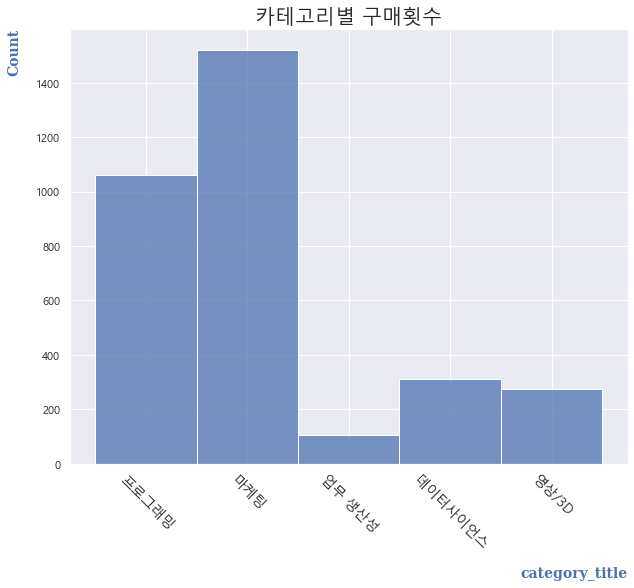

In [326]:
plt.figure(figsize=(10,8))
sns.histplot(data= df_RED2,  x='category_title')
plt.title('카테고리별 구매횟수', fontsize=20)
plt.xticks(rotation=-45, fontsize=14)
plt.xlabel('category_title', labelpad = 15 , fontdict=font1 , loc = 'right')
plt.ylabel('Count', labelpad = 15 , fontdict=font1, loc = 'top')
plt.show()

마케팅과 프로그래밍이 압도적으로 구매 수가 많음

ㅁ 'subcategory_title' 별 구매 횟수

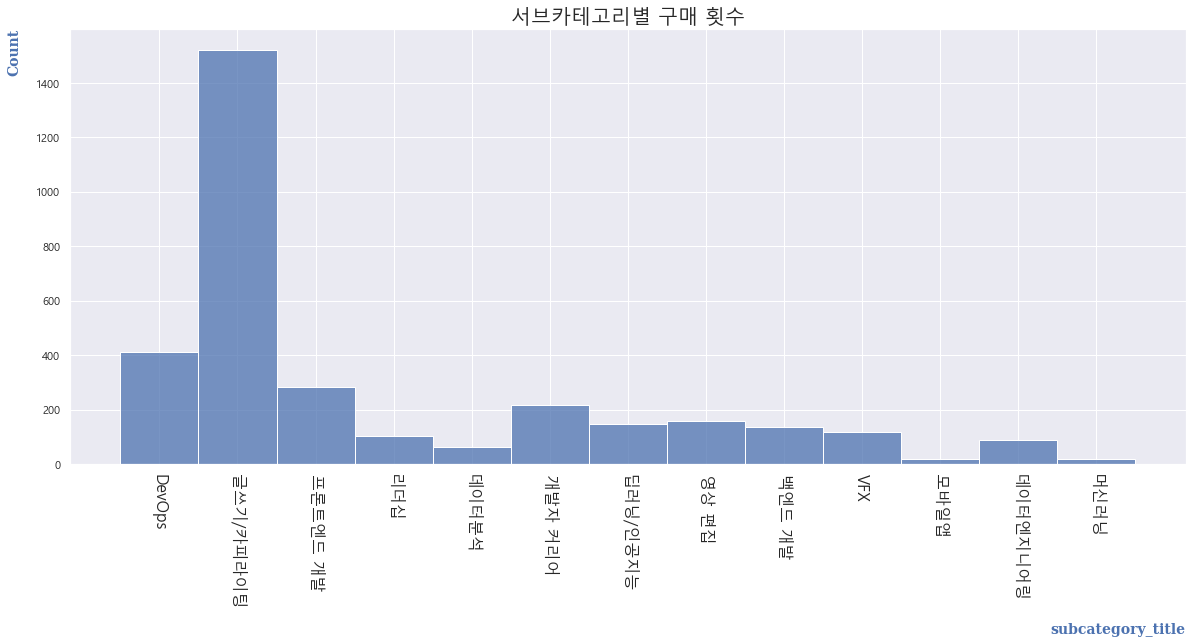

In [325]:
plt.figure(figsize=(20,8))
sns.histplot(data= df_RED2,  x='subcategory_title')
plt.title('서브카테고리별 구매 횟수', fontsize=20)
plt.xlabel('subcategory_title', labelpad = 15 , fontdict=font1 , loc = 'right')
plt.ylabel('Count', labelpad = 15 , fontdict=font1, loc = 'top')
plt.xticks(rotation=-90, fontsize=16)
plt.show()

특히 글쓰기/카피라이팅이 압도적으로 구매량이 제일 높음

ㅁ 상관계수로 분석

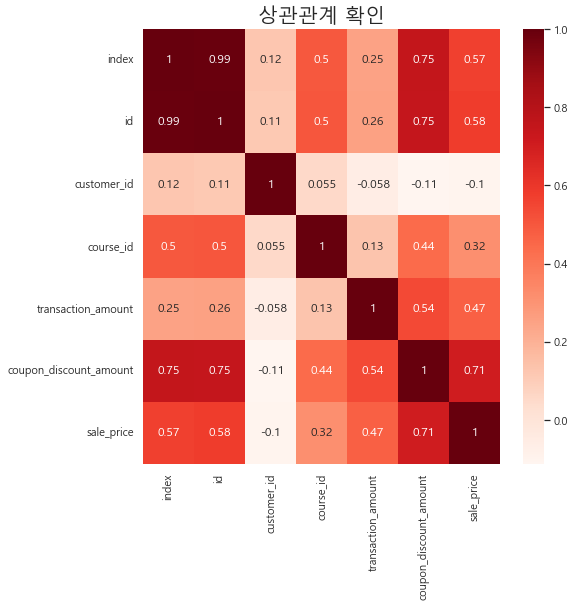

In [324]:
plt.figure(figsize=(8, 8))
sns.heatmap(data = df_RED2.corr(), cmap='Reds', annot=True)
plt.title('상관관계 확인', fontsize=20)
plt.show()

ㅁ 강의 개설의 시간적 추의

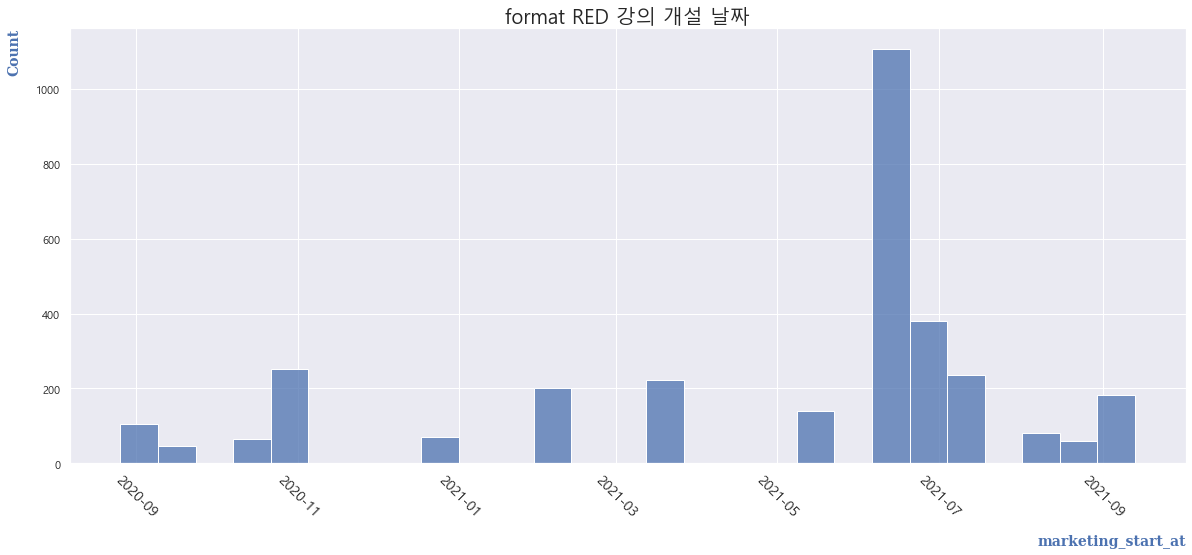

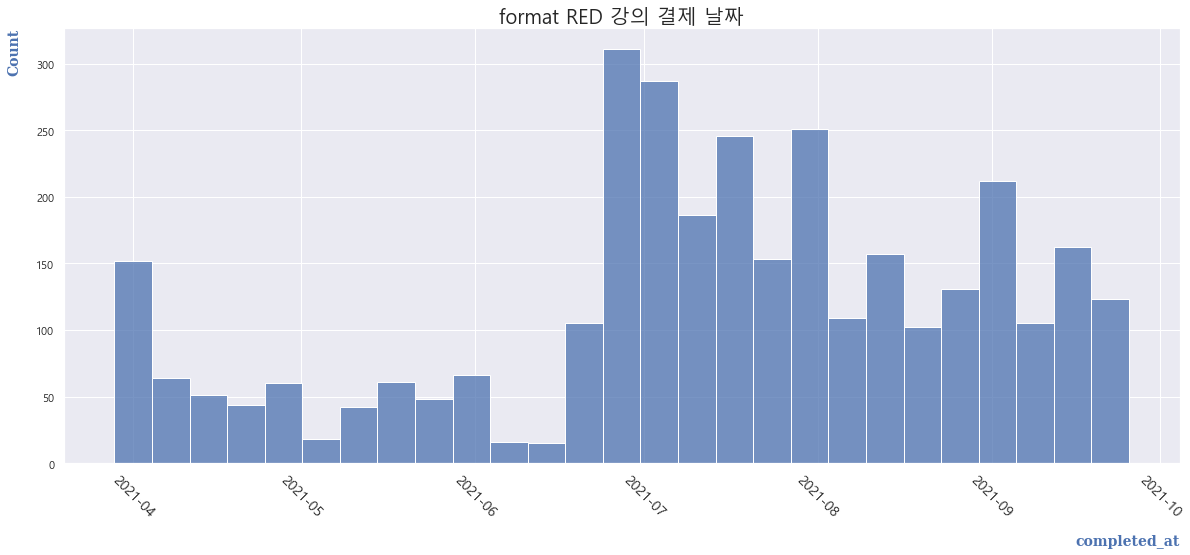

In [342]:
plt.figure(figsize=(20,8))
sns.histplot(data= df_RED2,  x='marketing_start_at')
plt.title('format RED 강의 개설 날짜', fontsize=20)
plt.xlabel('marketing_start_at', labelpad = 15 , fontdict=font1 , loc = 'right')
plt.ylabel('Count', labelpad = 15 , fontdict=font1, loc = 'top')
plt.xticks(rotation=-45, fontsize=14)
plt.show()

plt.figure(figsize=(20,8))
sns.histplot(data= df_RED2,  x='completed_at')
plt.title('format RED 강의 결제 날짜', fontsize=20)
plt.xlabel('completed_at', labelpad = 15 , fontdict=font1 , loc = 'right')
plt.ylabel('Count', labelpad = 15 , fontdict=font1, loc = 'top')
plt.xticks(rotation=-45, fontsize=14)
plt.show()

In [200]:
df_RED2['marketing_start_at'].unique()

array(['2021-02-08T00:00:00.000000000', '2021-03-19T00:00:00.000000000',
       '2020-11-04T00:00:00.000000000', '2020-09-11T00:00:00.000000000',
       '2020-12-30T00:00:00.000000000', '2020-09-04T00:00:00.000000000',
       '2020-10-23T00:00:00.000000000', '2020-08-26T00:00:00.000000000',
       '2020-10-16T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-06-18T17:00:00.000000000', '2021-06-29T00:00:00.000000000',
       '2021-07-01T00:00:00.000000000', '2021-07-02T00:00:00.000000000',
       '2021-07-09T00:00:00.000000000', '2021-07-13T00:00:00.000000000',
                                 'NaT', '2021-08-09T00:00:00.000000000',
       '2021-08-23T00:00:00.000000000', '2021-08-30T00:00:00.000000000',
       '2021-09-06T00:00:00.000000000', '2021-09-13T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [219]:
df_market = df_RED2.loc[df_RED2.marketing_start_at == '2021-06-18T17:00:00.000000000', : ] # 6월 18일 5시 개설된 강의 확인
x = df_market['category_title']
y = df_market['subcategory_title']

print(x.unique() , y.unique(),'\n')
print(x.value_counts(),'\n\n',y.value_counts())

['마케팅'] ['글쓰기/카피라이팅'] 

마케팅    1107
Name: category_title, dtype: int64 

 글쓰기/카피라이팅    1107
Name: subcategory_title, dtype: int64


*** 2021년 6월에 마케팅 - 글쓰기/카피라이팅 강의 구매량 급증 (1107) 

In [393]:
df_market['subcategory_title'].unique()

array(['글쓰기/카피라이팅'], dtype=object)

In [343]:
df_RED2['completed_at'].unique()

array(['2021-03-28T15:43:59.000000000', '2021-03-28T16:07:13.000000000',
       '2021-03-28T17:29:10.000000000', ...,
       '2021-09-25T08:09:48.000000000', '2021-09-25T09:06:10.000000000',
       '2021-09-25T11:57:01.000000000'], dtype='datetime64[ns]')

In [344]:
df_RED2['completed_at'].nunique()

3263

In [347]:
df_RED2['completed_at'] #dtype : datetime64 확인

6       2021-03-28 15:43:59
12      2021-03-28 16:07:13
28      2021-03-28 17:29:10
32      2021-03-28 17:56:03
36      2021-03-28 18:10:49
                ...        
65185   2021-09-25 04:46:20
65186   2021-09-25 04:46:45
65196   2021-09-25 08:09:48
65203   2021-09-25 09:06:10
65225   2021-09-25 11:57:01
Name: completed_at, Length: 3277, dtype: datetime64[ns]

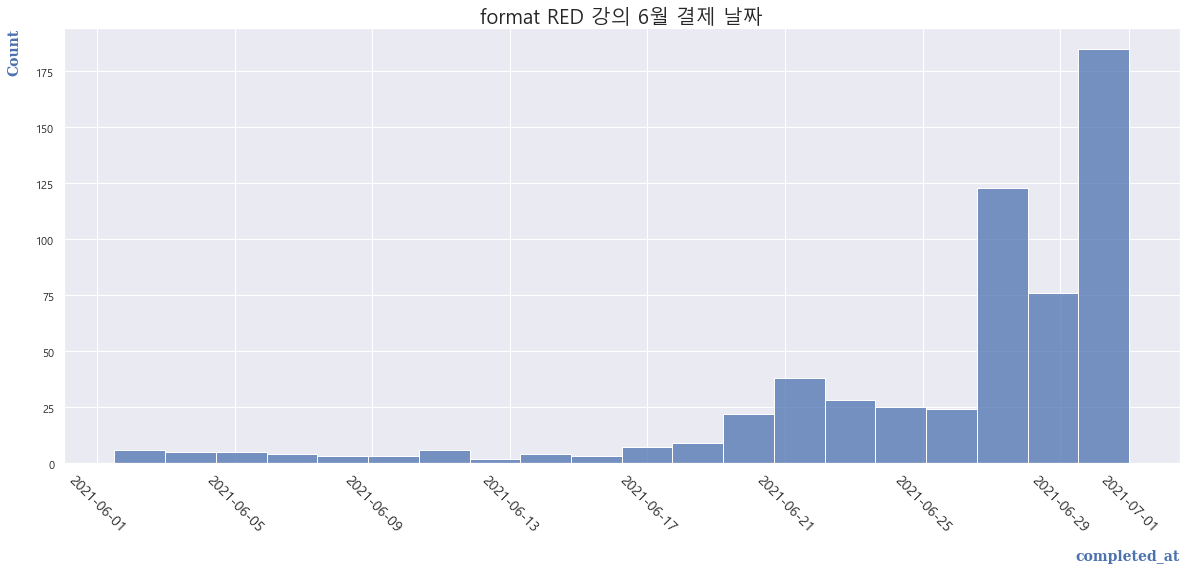

In [361]:
june = df_RED2[df_RED2.completed_at.dt.month==6] #결제날짜가 6월 추출

#cond_RED = df_RED2['completed_at']  이거 대신 씀
#df_RED_purc = df_RED2[cond_RED.str.contains('2021-06')] #contains
#df_RED_purc['completed_at'].value_counts()

plt.figure(figsize=(20,8))
sns.histplot(data= june,  x='completed_at')
plt.title('format RED 강의 6월 결제 날짜', fontsize=20)
plt.xlabel('completed_at', labelpad = 15 , fontdict=font1 , loc = 'right')
plt.ylabel('Count', labelpad = 15 , fontdict=font1, loc = 'top')
plt.xticks(rotation=-45, fontsize=14)
plt.show()

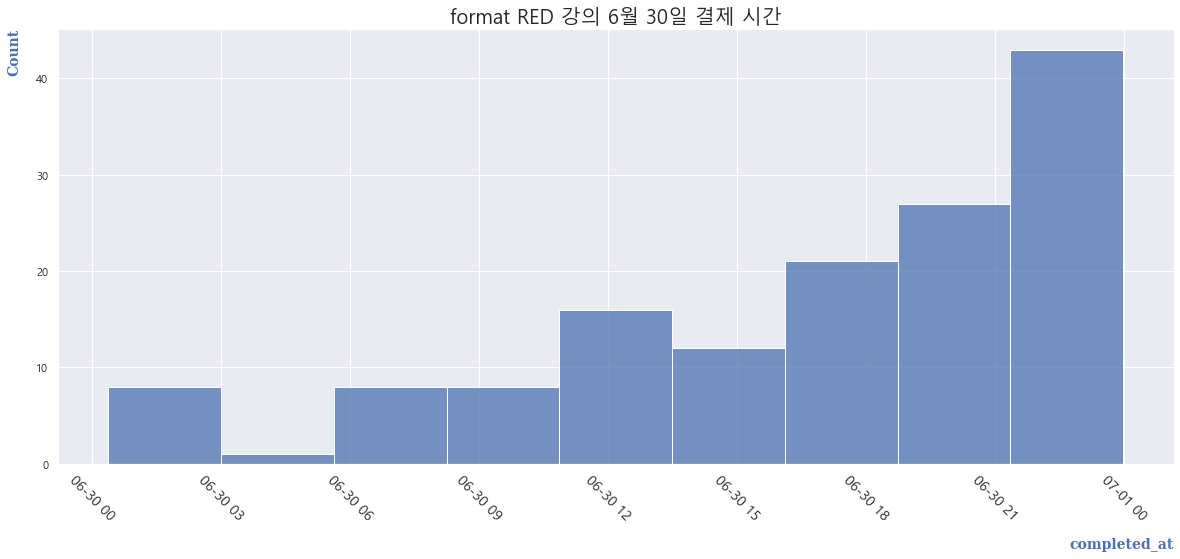

In [364]:
june30 = june[june.completed_at.dt.day==30] #결제날짜가 6월 30일 추출

plt.figure(figsize=(20,8))
sns.histplot(data= june30,  x='completed_at')
plt.title('format RED 강의 6월 30일 결제 시간', fontsize=20)
plt.xlabel('completed_at', labelpad = 15 , fontdict=font1 , loc = 'right')
plt.ylabel('Count', labelpad = 15 , fontdict=font1, loc = 'top')
plt.xticks(rotation=-45, fontsize=14)
plt.show()

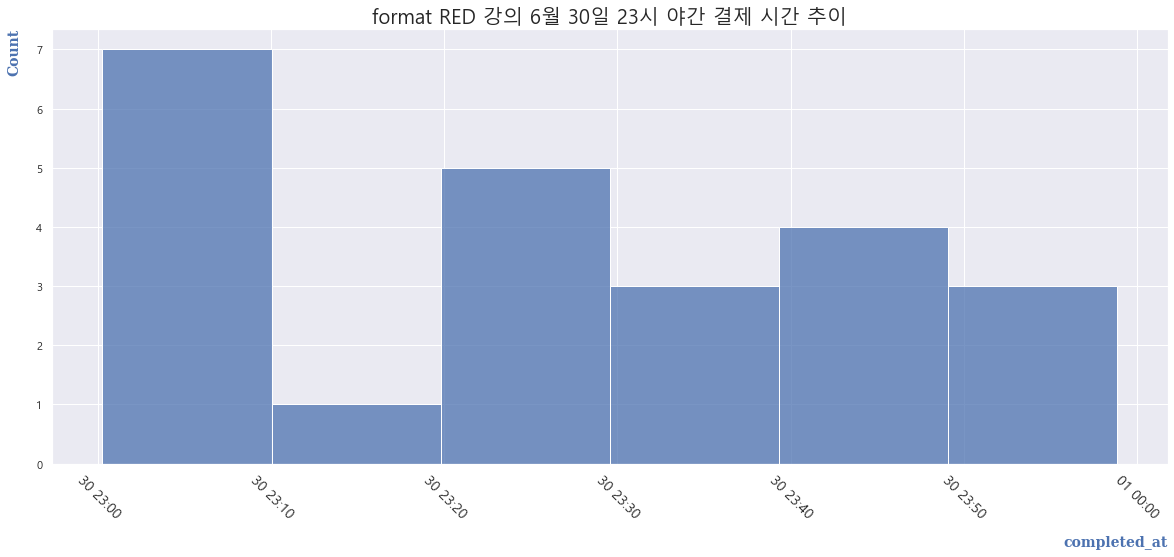

In [388]:
june30_n = june30[june30['completed_at'].dt.hour==23]

plt.figure(figsize=(20,8))
sns.histplot(data= june30_n,  x='completed_at')
plt.title('format RED 강의 6월 30일 23시 야간 결제 시간 추이', fontsize=20)
plt.xlabel('completed_at', labelpad = 15 , fontdict=font1 , loc = 'right')
plt.ylabel('Count', labelpad = 15 , fontdict=font1, loc = 'top')
plt.xticks(rotation=-45, fontsize=14)
plt.show()

In [389]:
df_purc = june.loc[june.completed_at.dt.day == 30, : ] # 6월 30일 결제된 강의들
x = df_purc['category_title']
y = df_purc['subcategory_title']

print(x.unique() , y.unique(),'\n')
print(x.value_counts(),'\n\n',y.value_counts())

['마케팅' '프로그래밍' '데이터사이언스'] ['글쓰기/카피라이팅' 'DevOps' '개발자 커리어' '데이터분석'] 

마케팅        121
프로그래밍       22
데이터사이언스      1
Name: category_title, dtype: int64 

 글쓰기/카피라이팅    121
DevOps        16
개발자 커리어        6
데이터분석          1
Name: subcategory_title, dtype: int64


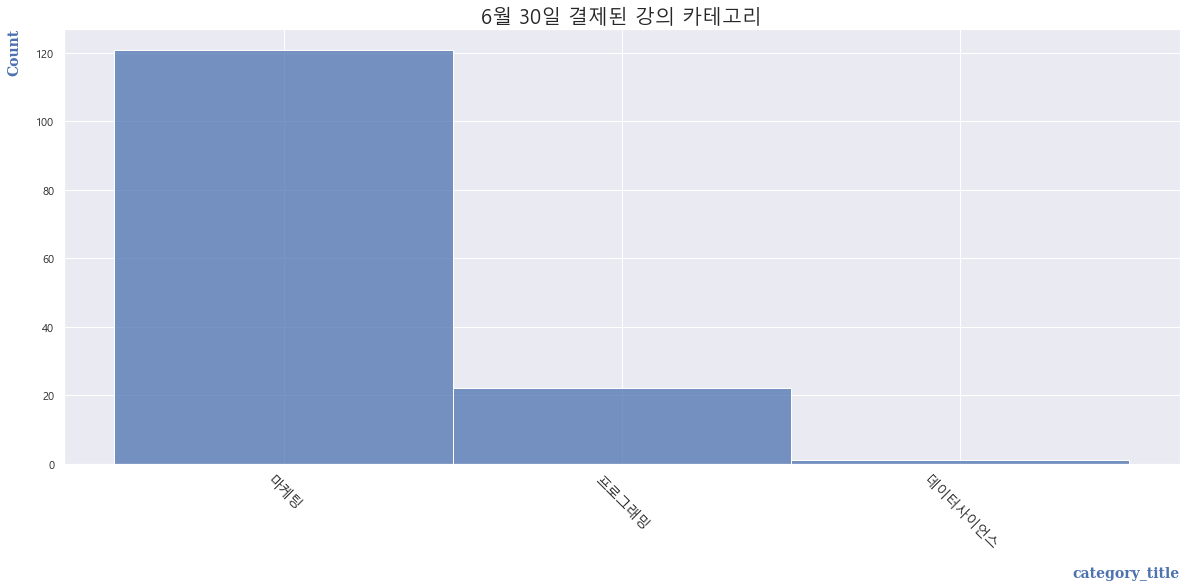

In [391]:
plt.figure(figsize=(20,8))
sns.histplot(data= df_purc,  x='category_title')
plt.title('6월 30일 결제된 강의 카테고리', fontsize=20)
plt.xlabel('category_title', labelpad = 15 , fontdict=font1 , loc = 'right')
plt.ylabel('Count', labelpad = 15 , fontdict=font1, loc = 'top')
plt.xticks(rotation=-45, fontsize=14)
plt.show()

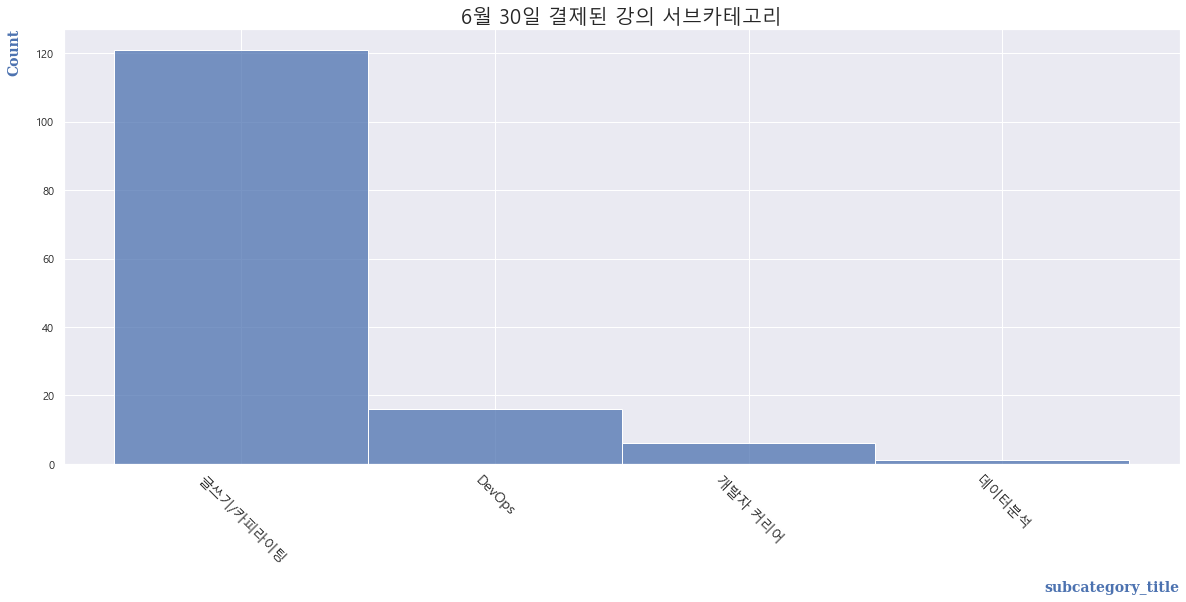

In [392]:
plt.figure(figsize=(20,8))
sns.histplot(data= df_purc,  x='subcategory_title')
plt.title('6월 30일 결제된 강의 서브카테고리', fontsize=20)
plt.xlabel('subcategory_title', labelpad = 15 , fontdict=font1 , loc = 'right')
plt.ylabel('Count', labelpad = 15 , fontdict=font1, loc = 'top')
plt.xticks(rotation=-45, fontsize=14)
plt.show()

ㅁ 결제 경로

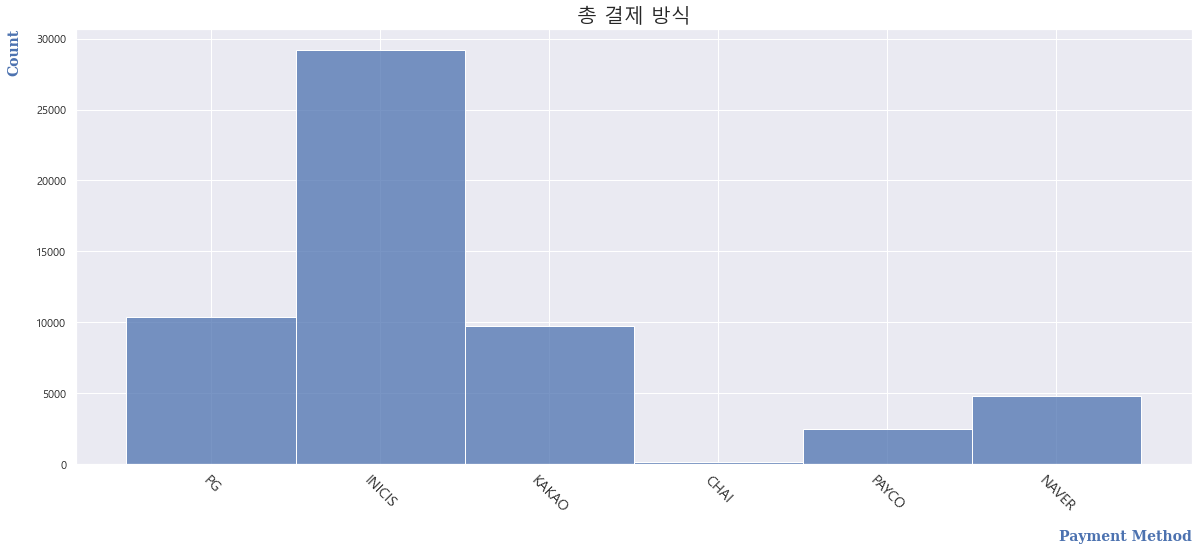

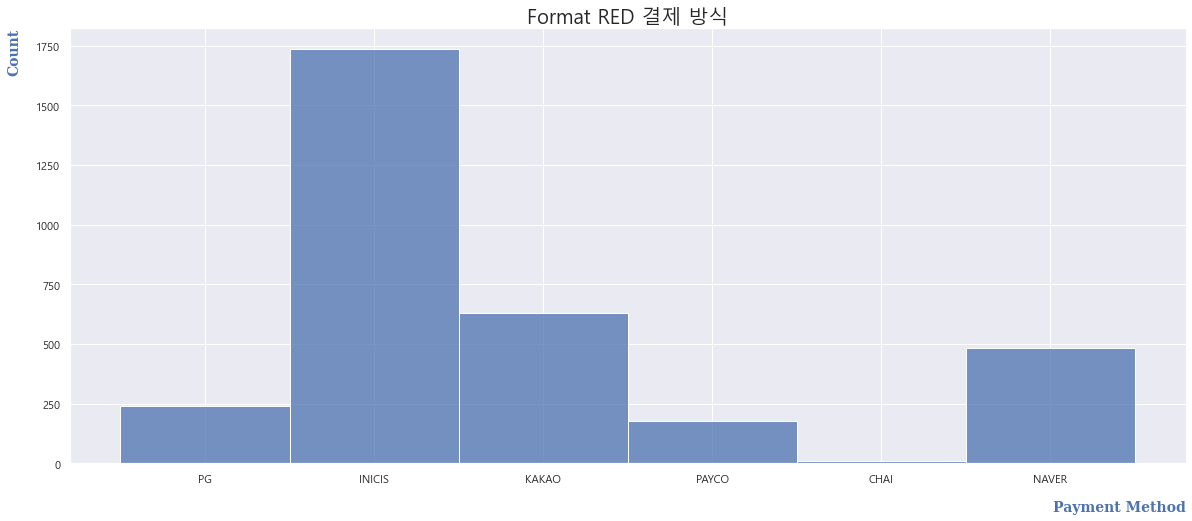

In [321]:
plt.figure(figsize=(20,8))
sns.histplot(data= df,  x='pg')
plt.title('총 결제 방식', fontsize=20)
plt.xticks(rotation=-45, fontsize=14)
plt.xlabel('Payment Method', labelpad = 15 , fontdict=font1 , loc = 'right')
plt.ylabel('Count', labelpad = 15 , fontdict=font1, loc = 'top')
#plt.grid(True, axis='y', color='red', alpha=0.5, linestyle='--')
plt.show()

plt.figure(figsize=(20,8))
sns.histplot(data= df_RED2,  x='pg')
plt.title('Format RED 결제 방식', fontsize=20)
plt.xlabel('Payment Method', labelpad = 15 , fontdict=font1 , loc = 'right')
plt.ylabel('Count', labelpad = 15 , fontdict=font1, loc = 'top')
plt.show()

전체 데이터의 결제방식과 큰틀에선 대체적으로 동일하다고 판단

<AxesSubplot:title={'center':'글쓰기/카피라이팅 결제 방식'}, ylabel='pg,method'>

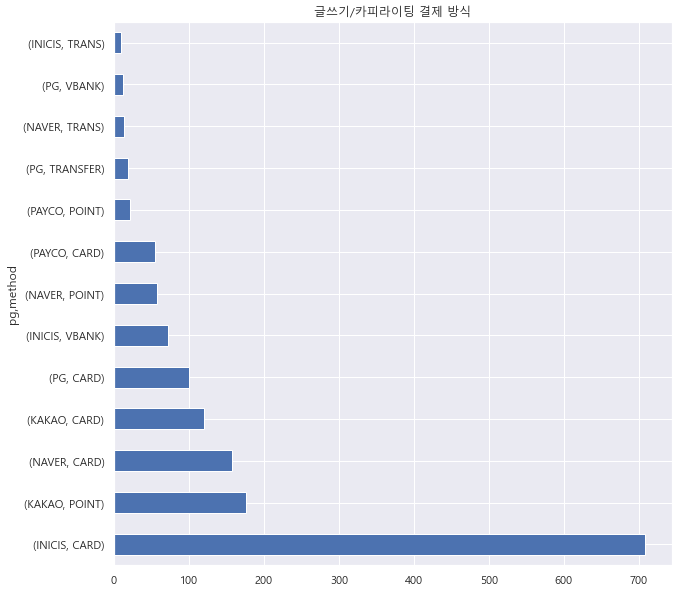

In [312]:
df_pg = df_RED2.loc[df_RED2.subcategory_title == '글쓰기/카피라이팅', : ]
df_pg[['pg','method']].value_counts().plot(kind='barh',title='글쓰기/카피라이팅 결제 방식', figsize=(10,10)) #글쓰기/카피라이팅 결제 방식 확인

결제방식은 INICIS-CARD로 가장 많이 마케팅-글쓰기/카피라이팅를 결제함.

In [234]:
df_RED2['coupon_title'].unique() #RED format에서 가장 많이 쓰인 쿠폰 확인해보기

array([nan, '[15%시크릿쿠폰] 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법',
       '[30%할인]The RED : 백발의 개발자를 꿈꾸며 : 코드리뷰, 레거시와 TDD by 백명석, 최범균',
       '[재결제쿠폰]The RED 조형기 출시할인', '조형기 10% 추가 할인 쿠폰',
       '[RED 권오준] 20% 시크릿 쿠폰', '[재결제쿠폰]조형기 10% 추가 할인 쿠폰',
       '[특별쿠폰] 프론트엔드 개발 초격차패키지 기수강생께 추천하는 실무 학습',
       '[시크릿 쿠폰] 빛과 색의 비주얼 스토리텔링 20% 할인쿠폰',
       '[30%쿠폰] The RED 고객 경험을 개선하는 A/B테스트 기반 모바일 앱 개발 신규 강의 할인',
       '[분할결제] 87,000원 차감 쿠폰',
       '[할인 쿠폰] The RED : 현실 데이터를 활용한 추천시스템 구현 A to Z by 번개장터 CTO 이동주 20% 할인',
       '[50% 할인 쿠폰] The RED : 김영하 할인 쿠폰',
       '[시크릿 쿠폰] 이호성의 언리얼 엔진 라이팅 25% 할인쿠폰',
       '[20%할인] The RED : Hadoop & Spark 아키텍처 딥다이브',
       '[재발급/시크릿 쿠폰] 이호성의 언리얼 엔진 라이팅 25% 할인쿠폰_재결제',
       '[30% 시크릿 할인] The RED : 개발자로 살아남기 : 30년을 주도하는 9가지 필수 기술 by 박종천'],
      dtype=object)

<AxesSubplot:>

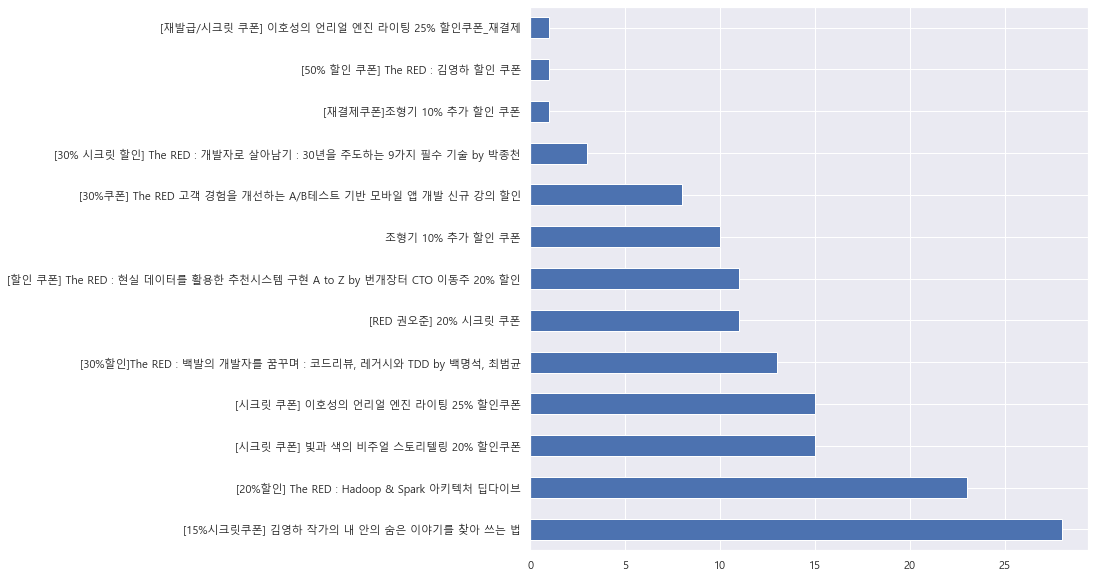

In [330]:
df_RED.loc[:,'coupon_title'] = df2['coupon_title'].fillna('')
cond_RED2 = df_RED2['coupon_title']
df_RED_discount = df_RED2[cond_RED2.str.contains('%')]

df_RED_discount['coupon_title'].value_counts().plot(kind='barh', figsize=(10,10))

In [262]:
kim = df_RED2['coupon_title'].str.contains('김영하')
kim

6        False
12       False
28       False
32       False
36       False
         ...  
65185    False
65186    False
65196    False
65203    False
65225    False
Name: coupon_title, Length: 3277, dtype: bool

In [266]:
kim2 = df_RED2[kim == True]
kim2

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
27790,56691,1150331,"71,227.0","204,670.0",PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-06-18 21:53:39,119000,[15%시크릿쿠폰] 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,"21,000.0","140,000.0",KAKAO,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00
27872,56880,1150970,"380,442.0","204,670.0",PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-06-19 12:43:52,119000,[15%시크릿쿠폰] 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,"21,000.0","140,000.0",INICIS,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00
27970,57101,1151631,"27,847.0","204,670.0",PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-06-19 20:56:08,119000,[15%시크릿쿠폰] 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,"21,000.0","140,000.0",INICIS,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00
27971,57102,1151632,"427,331.0","204,670.0",PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-06-19 20:56:34,119000,[15%시크릿쿠폰] 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,"21,000.0","140,000.0",INICIS,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00
27983,57128,1151758,"45,638.0","204,670.0",PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-06-19 22:26:08,119000,[15%시크릿쿠폰] 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,"21,000.0","140,000.0",INICIS,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00
28135,57464,1152822,"49,176.0","204,670.0",PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-06-20 16:50:09,119000,[15%시크릿쿠폰] 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,"21,000.0","140,000.0",KAKAO,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00
28652,58561,1156145,"38,480.0","204,670.0",PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-06-22 00:15:14,119000,[15%시크릿쿠폰] 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,"21,000.0","140,000.0",INICIS,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00
28685,58629,1156353,"529,616.0","204,670.0",PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-06-22 06:45:44,119000,[15%시크릿쿠폰] 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,"21,000.0","140,000.0",PAYCO,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00
28771,58819,1157066,"490,305.0","204,670.0",PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-06-22 14:41:29,119000,[15%시크릿쿠폰] 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,"21,000.0","140,000.0",KAKAO,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00
29036,59432,1159336,"175,719.0","204,670.0",PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-06-23 15:47:56,119000,[15%시크릿쿠폰] 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,"21,000.0","140,000.0",INICIS,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00


****  김영하 작가가 하는 강의를 얼마나 듣는지 확인해보기 - 유입 경로도 추측해보기

https://youtu.be/bgNVOKw08Jg

실제로 위 링크와 함께 홍보 영상들이 유튜브에 있음을 확인 (Aug 5, 2021 일괄 업로드)

*패캠 강의 홍보 링크
https://fastcampus.co.kr/mkt_red_kyh?utm_source=youtube&utm_medium=organic&utm_campaign=prd%5E210805%5E204670&utm_content=fcchannel%5E204670


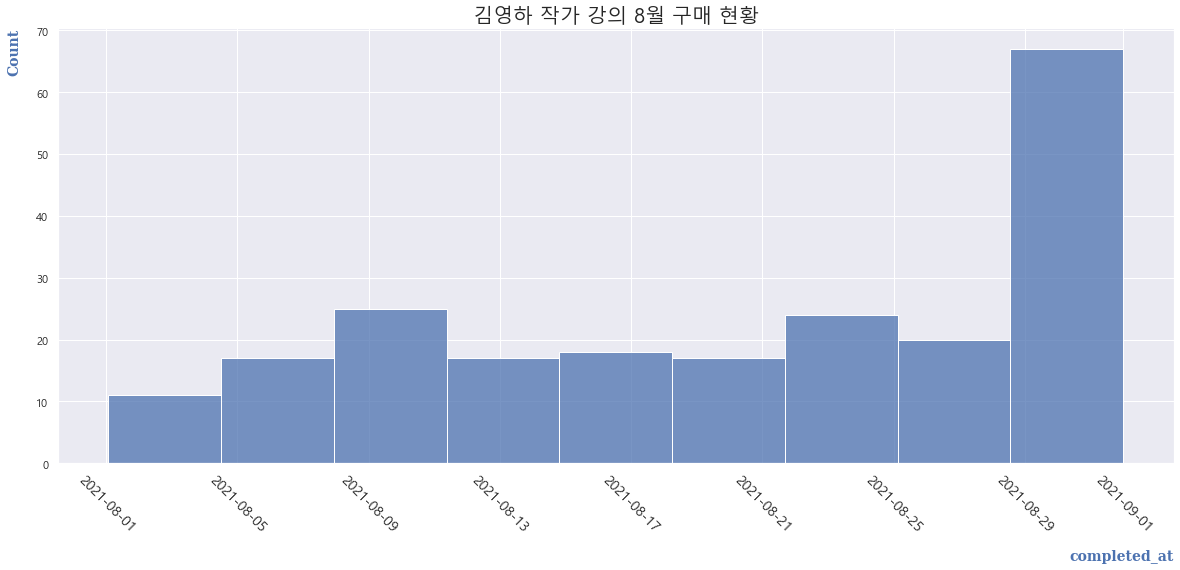

In [399]:
august = df_RED2[df_RED2.completed_at.dt.month==8]
kim_august = august[august.course_title.str.contains('김영하')]

plt.figure(figsize=(20,8))
sns.histplot(data= kim_august,  x='completed_at')
plt.title('김영하 작가 강의 8월 구매 현황', fontsize=20)
plt.xlabel('completed_at', labelpad = 15 , fontdict=font1 , loc = 'right')
plt.ylabel('Count', labelpad = 15 , fontdict=font1, loc = 'top')
plt.xticks(rotation=-45, fontsize=14)
plt.show()

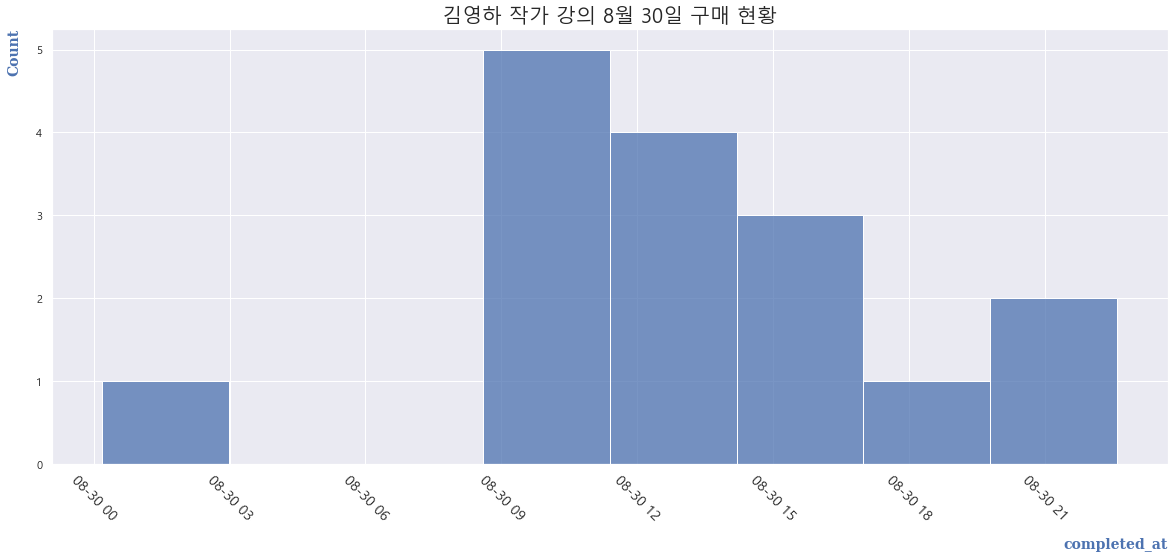

In [405]:
august30 = kim_august.loc[kim_august.completed_at.dt.day == 30, : ]

plt.figure(figsize=(20,8))
sns.histplot(data= august30,  x='completed_at')
plt.title('김영하 작가 강의 8월 30일 구매 현황', fontsize=20)
plt.xlabel('completed_at', labelpad = 15 , fontdict=font1 , loc = 'right')
plt.ylabel('Count', labelpad = 15 , fontdict=font1, loc = 'top')
plt.xticks(rotation=-45, fontsize=14)
plt.show()

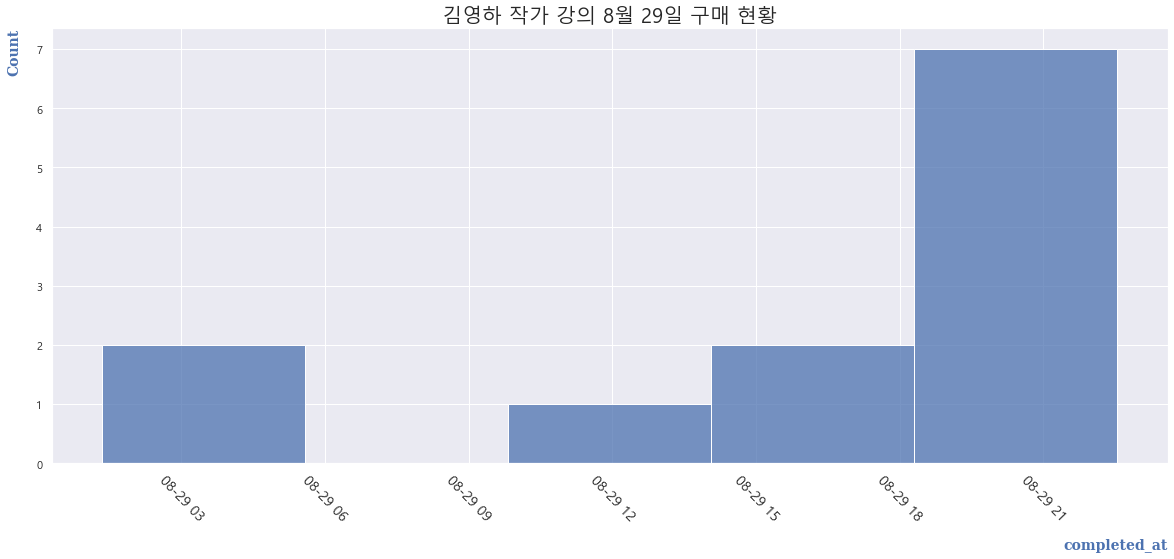

In [412]:
august29 = kim_august.loc[kim_august.completed_at.dt.day == 29, : ]

plt.figure(figsize=(20,8))
sns.histplot(data= august29,  x='completed_at')
plt.title('김영하 작가 강의 8월 29일 구매 현황', fontsize=20)
plt.xlabel('completed_at', labelpad = 15 , fontdict=font1 , loc = 'right')
plt.ylabel('Count', labelpad = 15 , fontdict=font1, loc = 'top')
plt.xticks(rotation=-46, fontsize=14)
plt.show()

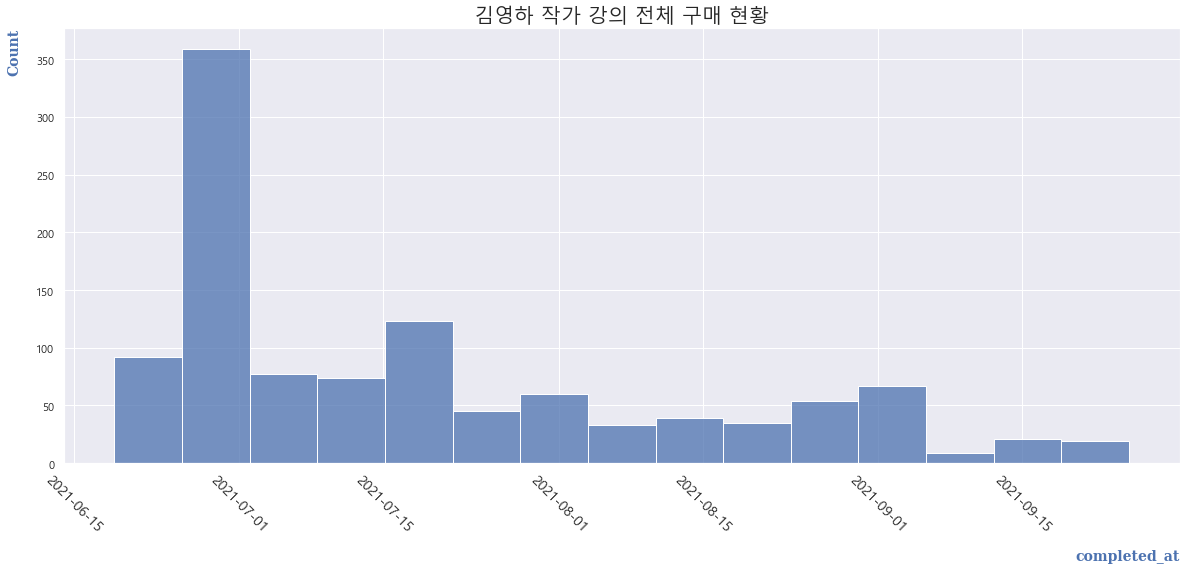

In [401]:
kim_course = df_RED2[df_RED2.course_title.str.contains('김영하')]

plt.figure(figsize=(20,8))
sns.histplot(data= kim_course,  x='completed_at')
plt.title('김영하 작가 강의 전체 구매 현황', fontsize=20)
plt.xlabel('completed_at', labelpad = 15 , fontdict=font1 , loc = 'right')
plt.ylabel('Count', labelpad = 15 , fontdict=font1, loc = 'top')
plt.xticks(rotation=-45, fontsize=14)
plt.show()


분석 결과, 비록 유튜브에 8월 5일에 업로드한 홍보 영상이 40만명이 조회하여 강의 구매량이 증가한 추이였으나, 8월말 갑작스러운 구매 증가가 직접적으로 연관되는지 확인은 아직 못하였음.

추가적으로, 김영하 작가 강의 전체 구매 현황을 보았을때, 21년 6월말 새로 개설되었을 당시의 관심도보단 현저히 낮아 눈에 띄는 마케팅 성과는 없다고 판단.

In [ ]:
df_purc = august.loc[june.completed_at.dt.day == 30, : ] # 6월 30일 결제된 강의들

### 여기서부턴 그냥 테스트

<AxesSubplot:title={'center':'쿠폰 사용 밀도'}>

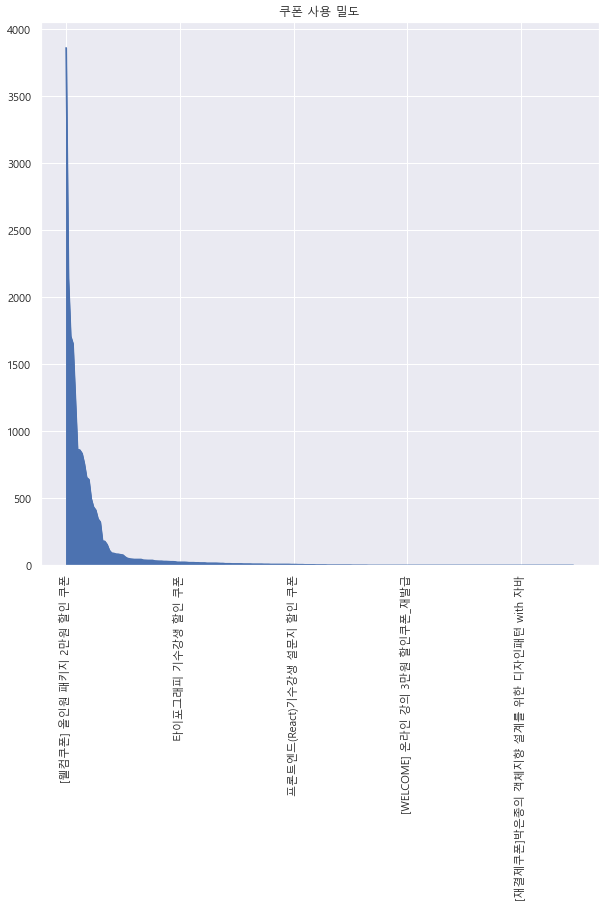

In [301]:
test = df2['coupon_title'].value_counts() #.plot(figsize=(50,20))


ax = test.plot(kind='area',figsize=(10,10),title='쿠폰 사용 밀도',rot=90, use_index=True)
#ax.set_xticks(range(len(test.index)))
#ax.set_xticklabels(test.index)

ax

In [276]:
test.plot??


In [288]:
test #.copy 함수를 써야된다

[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                                              3864
[WELCOME] 온라인 강의 3만원 할인쿠폰                                             2143
[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰                                              1711
[WELCOME] 온라인 강의 2만원 할인쿠폰                                             1656
[WELCOME] 온라인 강의 1만원 할인쿠폰                                             1265
                                                                      ... 
[분할결제]초격차 패키지 : 한 번에 끝내는 프론트엔드 개발_116000원                                1
[시크릿쿠폰] 초격차 포토샵 활용 20% 할인쿠폰_미사용 재발급                                      1
[분할결제]올인원 패키지 : 13만 구독자 피피티프로젝트의 누구나 쉽게 배우는 시선강탈 피피티 디자인_46,000원결제       1
[분할결제]올인원 패키지 : 13만 구독자 피피티프로젝트의 누구나 쉽게 배우는 시선강탈 피피티 디자인_54,000원결제       1
[재결제쿠폰]초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                                1
Name: coupon_title, Length: 224, dtype: int64

In [308]:
school=df[df['format']=='스쿨']
school['course_title'].unique()

array(['풀스택 개발 취업 완성 스쿨 14기', 'UX/UI 디자인 스쿨 16기', '데이터 사이언스 취업완성 스쿨 17기',
       '네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트', '네카라쿠배 프론트엔드 취업완성 스쿨 2기_2차 테스트'],
      dtype=object)